In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [19]:
df = pd.read_csv("heart.csv(1)")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [11]:
from sklearn.model_selection import train_test_split

predictors = df.drop("target",axis=1)
target = df["target"]

X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.20,random_state=0)

In [13]:
X_train.shape

(242, 13)

In [20]:
X_test.shape

(61, 13)

In [28]:
from sklearn.metrics import accuracy_score, confusion_matrix

class KNNClassifier:
    def __init__(self, k):
        self.k = k

    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train

    def predict(self, X_test):
        predictions = []
        for i in range(len(X_test)):
            distances = np.sqrt(np.sum(np.square(self.X_train - X_test[i]), axis=1))
            nearest_neighbors = np.argsort(distances)[:self.k]
            neighbor_labels = [self.y_train[idx] for idx in nearest_neighbors]
            prediction = max(set(neighbor_labels), key=neighbor_labels.count)
            predictions.append(prediction)
        return np.array(predictions)

# Initialize the K-NN Classifier
knn = KNNClassifier(k=3)

# Fit the model
knn.fit(X_train.values, Y_train.values)

# Make predictions on test set
predictions = knn.predict(X_test.values)

# Calculate accuracy
accuracy = accuracy_score(Y_test, predictions)
print("Accuracy:", accuracy)

# Confusion Matrix
conf_matrix = confusion_matrix(Y_test, predictions)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.639344262295082
Confusion Matrix:
[[17 10]
 [12 22]]


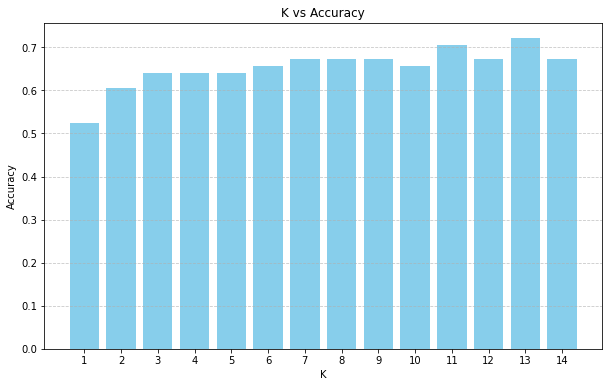

Value of K for maximum accuracy: 13
Maximum accuracy: 0.7213114754098361


In [29]:
import matplotlib.pyplot as plt

# Initialize lists to store K values and corresponding accuracies
k_values = []
accuracies = []

# Iterate over different values of K
for k in range(1, 15):
    # Initialize and train the K-NN classifier
    knn = KNNClassifier(k=k)
    knn.fit(X_train.values, Y_train.values)
    
    # Make predictions on test set
    predictions = knn.predict(X_test.values)
    
    # Calculate accuracy
    accuracy = np.mean(predictions == Y_test.values)
    
    # Append K value and accuracy to lists
    k_values.append(k)
    accuracies.append(accuracy)

# Plot K vs accuracy
plt.figure(figsize=(10, 6))
plt.bar(k_values, accuracies, color='skyblue')
plt.title('K vs Accuracy')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Find the value of K for maximum accuracy
max_accuracy_index = np.argmax(accuracies)
max_accuracy_k = k_values[max_accuracy_index]
print("Value of K for maximum accuracy:", max_accuracy_k)
print("Maximum accuracy:", accuracies[max_accuracy_index])
